# Example 5. Hand-made Adaline with Stochastic/Online Gradian Decent
---
1. **Adaline** : As the defination in [Example 4](example_04_AdalineGD.ipynb), the algorithm bases on Adaptive Linear algorithm, i.e. the *cost function* is **Sum of Squarde Error** with linear hyperplane.
2. **Stochastic** : It is also called **online**, which updates the weight data point by data point instead of *batch* leaning as Adaline. Thus, the form for updating weight $dw$ in Adaline is changed from $$dw_j = \left[\eta\sum_i^N[y_i-\phi(z_i(w))]x_i\right]_j$$ to $$dw_{j,i} = \left[\eta(y_i-\phi(z_i(w))x_i\right]_j\ ,$$ where $j$ is index of iteration, i.e. the $dw$ is from summing over all data ponit to individual. The new *Pyhton* class for this online learning algorithm is [AdalineGD_online.py](AdalineGD_online.py).

------
### Import basic needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_decision_regions import * 

---
### Load, setup data/variables and standardization
1\. Input Iris.data (.CSV) with *pandas* to be a dataframe (df)

In [2]:
df = pd.read_csv('iris.data', header=None)[:100] # Keep data from 0-99
df.columns = ['sepal_length', 'x_1', 'petal_length', 'x_3', 'type']
df.tail()

,sepal_length,x_1,petal_length,x_3,type
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [3]:
# Filling y and X
X = df.iloc[:, [0,2]].values
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [4]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std() # sepal_length
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std() # petal_length

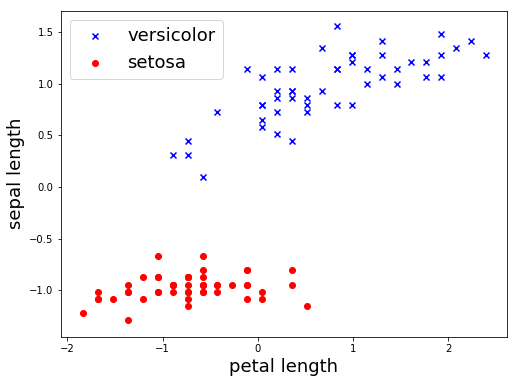

In [5]:
# Ploting : significance variables
plt.figure(figsize=(8, 6))
plt.scatter(X_std[ y == 1, 0], X_std[ y == 1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X_std[ y ==-1, 0], X_std[ y ==-1, 1], color='red',  marker='o', label='setosa')
plt.xlabel('petal length', fontsize=18)
plt.ylabel('sepal length', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.show()

In [6]:
from AdalineGD_online import AdalineGD_online

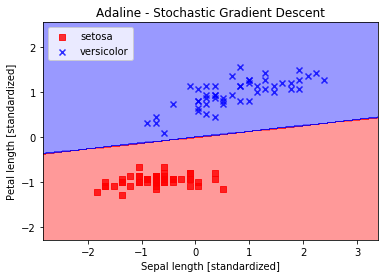

Weights [w0, w1,....] : [ 0.01081067 -0.13961527  1.07501121]


In [7]:
ada = AdalineGD_online(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
print 'Weights [w0, w1,....] : '+str(ada.w_)

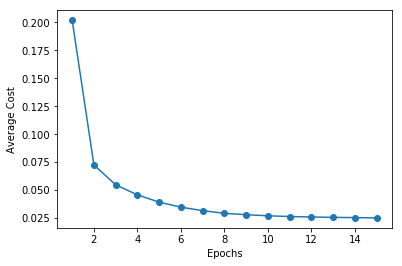

In [8]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()